In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def wind_function(time: float, gust_peak_time: float, gust_type: int) -> float:
    """
    This function returns a scalar gust value depending on the time and gust type.
    Based on: Cole, Kenan, and Adam Wickenheiser. "Spatio-Temporal Wind Modeling for UAV Simulations." arXiv e-prints (2019): arXiv-1905.
    
    param@ time: current time [s]
    param@ gust_peak_time: time of gust peak [s]
    param@ gust_type: integer to select gust options.
        gust_type == 0 -> semi-square impulse
        gust_type == 1 -> custom (change values in the function as you see fit)
        ...            -> add additional types as desired

    return@ float representing a 'gust scalar', to be added to a nominal wind [m/s]
    """
    if gust_type == 0: #Semi-Square Pulse
        tg1 = 0.1 #rising time
        tg2 = 0.1 #falling time
        th = 1  #holding time
        g1 = 1  #peak gust value
        g3 = 6 #change 'curvature'
        g4 = .1 #change magnitude of dip before gust
        g5 = .1 #change magnitude of dip after gust
    elif gust_type == 1: #Custom
        tg1 = 1 #rising time
        tg2 = 1 #falling time
        th = 1  #holding time
        g1 = 1  #peak gust value
        g3 = .3 #change 'curvature'
        g4 = 1 #change magnitude of dip before gust
        g5 = 2 #change magnitude of dip after gust
    else:
        print('No known gust_type specified.')
        return 0

    g2r = 2*g3/tg1
    g2f = 2*g3/tg2
    
    t1 = np.linspace(-t_off,0.5*tg1)
    t2 = np.linspace(0.5*tg1,0.5*tg1+th)
    t3 = np.linspace(0.5*tg1+th,0.5*tg1+th+t_off)
    t = time - gust_peak_time
    
    if t<0.5*tg1: #Rising portion
        return g1*(1-(g2r*t-g3)**2)*np.exp(-(g2r*t-g3)**2/g4)
    elif t<0.5*tg1+th: #Holding portion
        return g1
    else: #Falling portion
        tstar = t + 0.5*(tg2 - tg1)-th
        return g1*(1-(g2f*tstar-g3)**2)*np.exp(-(g2f*tstar-g3)**2/g5)

Text(0.5, 1.0, 'Gust shape vs. time')

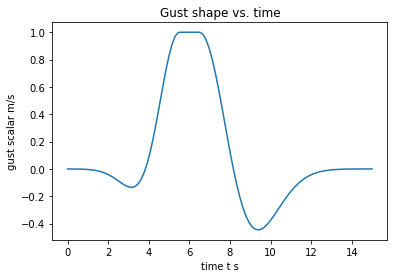

In [20]:
# Test function
tspan = np.linspace(0,15,100)
winds = []
for t in tspan:
    winds.append(wind_function(t,5,1))
plt.plot(tspan,winds)
plt.xlabel('time t s')
plt.ylabel('gust scalar m/s')
plt.title('Gust shape vs. time')

In [89]:
if 0<0: print(1)